In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import math
import statsmodels.api as sm


In [2]:
# Set the ticker and date rang
ticker = 'tsla'
start = datetime.datetime(2022, 10, 1)
end = datetime.datetime(2024, 9, 30)
# Download the data
stock = yf.download(ticker, start=start, end=end)
# Extract only the "Adj Close" column
stock_adj_close = stock['Adj Close']
# Calculate daily returns
stock_daily_returns = stock_adj_close.pct_change()*100
# Replace NaN values with 0
stock_daily_returns = stock_daily_returns.fillna(0)
# Create a DataFrame with a proper column name
stock_daily_returns_df = pd.DataFrame(stock_daily_returns)
stock_daily_returns_df.columns = ['Returns']
# Print the first few rows
print(stock_daily_returns_df.head())

[*********************100%***********************]  1 of 1 completed

             Returns
Date                
2022-10-03  0.000000
2022-10-04  2.904294
2022-10-05 -3.459752
2022-10-06 -1.112908
2022-10-07 -6.324276


In [3]:
# Get descriptive statistics for the 'Return' variable
return_stats = stock_daily_returns_df['Returns'].describe()
print(return_stats)

count    500.000000
mean       0.079847
std        3.621299
min      -12.334605
25%       -1.936325
50%        0.127330
75%        1.975456
max       15.306917
Name: Returns, dtype: float64


## Plot the price movement (adjusted close prices)

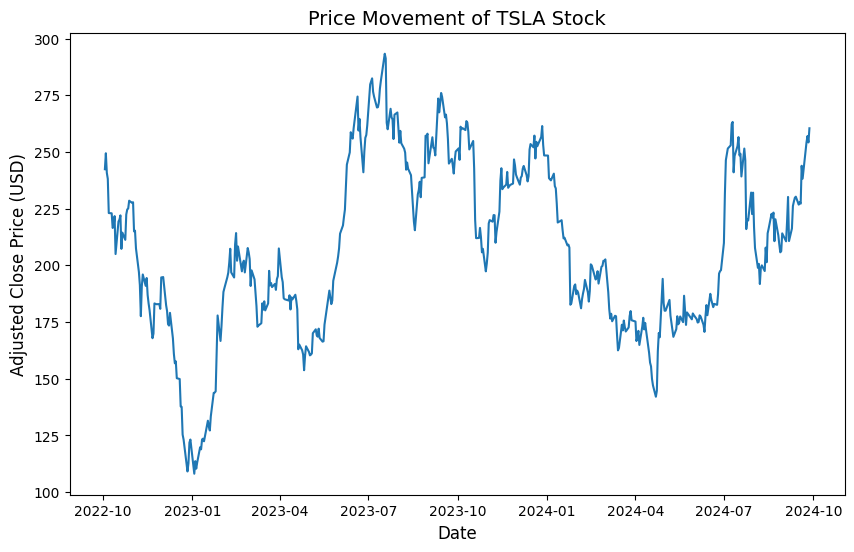

In [4]:
plt.figure(figsize=(10, 6))

# Plot the adjusted closing price
sns.lineplot(data=stock_adj_close)

# Add titles and labels
plt.title(f'Price Movement of {ticker.upper()} Stock', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)

# Show the plot
plt.show()

## Plot the daily returns movement

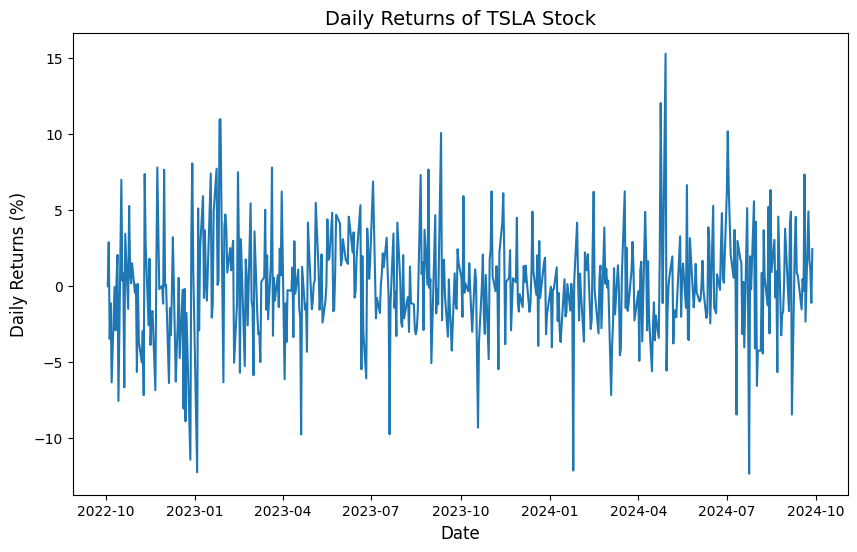

In [5]:
plt.figure(figsize=(10,6))

# Use seaborn to plot the returns with a line plot
sns.lineplot(data=stock_daily_returns_df, x=stock_daily_returns_df.index, y='Returns')

# Add titles and labels
plt.title(f'Daily Returns of {ticker.upper()} Stock', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)

# Show the plot
plt.show()